In [1]:
import pandas as pd
from scipy.stats import wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load NIAID queries

queries_df = pd.read_csv('./niaid_queries_revisited.csv', sep=',')
queries_df

,combination,search term,result id
0,original query,influenza,PRJNA658522
1,original query,influenza,PRJNA658529
2,original query,influenza,PRJNA658552
3,original query,influenza,PRJNA658564
4,original query,influenza,PRJNA658562
...,...,...,...
3995,c15,hiv,VIVLI_02021d26-0e96-424c-8fec-77cbd204fd8d
3996,c15,hiv,VIVLI_7a8a7234-ada3-465b-a608-347b5e74a542
3997,c15,hiv,VIVLI_7ac8687d-79c8-4860-8141-83776849e2df
3998,c15,hiv,VIVLI_242c4b5a-19b3-4a51-b885-05358ed89db6


In [3]:
# Drop combination column

queries_df = queries_df.drop('combination', axis = 1).copy()
queries_df

,search term,result id
0,influenza,PRJNA658522
1,influenza,PRJNA658529
2,influenza,PRJNA658552
3,influenza,PRJNA658564
4,influenza,PRJNA658562
...,...,...
3995,hiv,VIVLI_02021d26-0e96-424c-8fec-77cbd204fd8d
3996,hiv,VIVLI_7a8a7234-ada3-465b-a608-347b5e74a542
3997,hiv,VIVLI_7ac8687d-79c8-4860-8141-83776849e2df
3998,hiv,VIVLI_242c4b5a-19b3-4a51-b885-05358ed89db6


In [4]:
# Drop duplicates

queries_df = queries_df.drop_duplicates()
queries_df

,search term,result id
0,influenza,PRJNA658522
1,influenza,PRJNA658529
2,influenza,PRJNA658552
3,influenza,PRJNA658564
4,influenza,PRJNA658562
...,...,...
3917,hiv,VIVLI_7a8a7234-ada3-465b-a608-347b5e74a542
3924,hiv,DRYAD_doi.org:10.5061:dryad.wpzgmsbnz
3936,hiv,DRYAD_doi.org:10.5061:dryad.np5hqbzx5
3968,hiv,VIVLI_7ac8687d-79c8-4860-8141-83776849e2df


In [5]:
# Load ranked analysis

ranked_df = pd.read_csv('./ranked_analysis_scopes.csv', sep=',')
ranked_df

,scope,result id,original query,combi 1,combi 2,combi 3,combi 4,combi 5,combi 6,combi 7,combi 8,combi 9,combi 10,combi 11,combi 12,combi 13,combi 14,combi 15
0,broad,GSE109048,0.000000,0.000000,0.000000,0.000000,3.600,6.000000,0.000000,0.000000,0.000000,0.0,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000
1,broad,GSE118226,0.000000,0.000000,0.000000,0.000000,0.000,1.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,broad,GSE121592,0.000000,0.000000,0.000000,3.142857,5.500,3.666667,0.000000,0.000000,2.444444,5.5,4.400000,0.000000,0.000000,0.000000,3.666667,5.500000
3,broad,GSE121747,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,2.100000,0.000000,0.000000,0.000000,0.000000,2.333333
4,broad,GSE123487,0.000000,2.111111,6.333333,6.333333,4.750,3.800000,0.000000,2.714286,3.166667,3.8,2.714286,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,very specific,S-EPMC6166283,3.166667,3.800000,3.166667,2.714286,1.900,0.000000,3.166667,3.166667,2.714286,1.9,0.000000,3.166667,3.166667,2.111111,1.900000,0.000000
477,very specific,S-EPMC6952273,2.750000,2.750000,2.750000,5.500000,5.500,3.666667,2.750000,2.750000,3.666667,5.5,3.666667,2.750000,2.750000,2.750000,5.500000,3.666667
478,very specific,S-EPMC7182094,1.444444,1.444444,1.444444,1.300000,1.300,1.300000,1.444444,1.300000,1.300000,1.3,1.300000,1.444444,1.300000,1.300000,1.300000,1.300000
479,very specific,VIVLI_4561de30-5510-4875-9ef6-1327d249bf57,2.333333,2.333333,5.250000,5.250000,5.250,5.250000,2.625000,5.250000,5.250000,10.5,7.000000,3.000000,5.250000,10.500000,21.000000,21.000000


In [6]:
# Use shorter names for columns

ranked_df.rename(columns = {'original query': 'original', 'combi 1': 'c1', 'combi 2': 'c2', 'combi 3': 'c3',
                            'combi 4': 'c4', 'combi 5': 'c5', 'combi 6': 'c6', 'combi 7': 'c7', 
                            'combi 8': 'c8', 'combi 9': 'c9', 'combi 10': 'c10', 'combi 11': 'c11', 
                            'combi 12': 'c12', 'combi 13': 'c13', 'combi 14': 'c14', 'combi 15': 'c15'
                           }, inplace = True)
ranked_df

,scope,result id,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
0,broad,GSE109048,0.000000,0.000000,0.000000,0.000000,3.600,6.000000,0.000000,0.000000,0.000000,0.0,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000
1,broad,GSE118226,0.000000,0.000000,0.000000,0.000000,0.000,1.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,broad,GSE121592,0.000000,0.000000,0.000000,3.142857,5.500,3.666667,0.000000,0.000000,2.444444,5.5,4.400000,0.000000,0.000000,0.000000,3.666667,5.500000
3,broad,GSE121747,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,2.100000,0.000000,0.000000,0.000000,0.000000,2.333333
4,broad,GSE123487,0.000000,2.111111,6.333333,6.333333,4.750,3.800000,0.000000,2.714286,3.166667,3.8,2.714286,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,very specific,S-EPMC6166283,3.166667,3.800000,3.166667,2.714286,1.900,0.000000,3.166667,3.166667,2.714286,1.9,0.000000,3.166667,3.166667,2.111111,1.900000,0.000000
477,very specific,S-EPMC6952273,2.750000,2.750000,2.750000,5.500000,5.500,3.666667,2.750000,2.750000,3.666667,5.5,3.666667,2.750000,2.750000,2.750000,5.500000,3.666667
478,very specific,S-EPMC7182094,1.444444,1.444444,1.444444,1.300000,1.300,1.300000,1.444444,1.300000,1.300000,1.3,1.300000,1.444444,1.300000,1.300000,1.300000,1.300000
479,very specific,VIVLI_4561de30-5510-4875-9ef6-1327d249bf57,2.333333,2.333333,5.250000,5.250000,5.250,5.250000,2.625000,5.250000,5.250000,10.5,7.000000,3.000000,5.250000,10.500000,21.000000,21.000000


In [7]:
# Add search term info to ranked analysis data

ranked_df = ranked_df.merge(queries_df[['result id', 'search term']], 
                            how = 'left', on = 'result id').copy()
ranked_df

,scope,result id,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,search term
0,broad,GSE109048,0.000000,0.000000,0.000000,0.000000,3.600,6.000000,0.000000,0.000000,0.000000,0.0,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,myocardial infarction
1,broad,GSE118226,0.000000,0.000000,0.000000,0.000000,0.000,1.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,myocardial infarction
2,broad,GSE121592,0.000000,0.000000,0.000000,3.142857,5.500,3.666667,0.000000,0.000000,2.444444,5.5,4.400000,0.000000,0.000000,0.000000,3.666667,5.500000,t-cell function
3,broad,GSE121747,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,2.100000,0.000000,0.000000,0.000000,0.000000,2.333333,t-cell function
4,broad,GSE123487,0.000000,2.111111,6.333333,6.333333,4.750,3.800000,0.000000,2.714286,3.166667,3.8,2.714286,0.000000,0.000000,0.000000,0.000000,0.000000,myocardial infarction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,very specific,S-EPMC6166283,3.166667,3.800000,3.166667,2.714286,1.900,0.000000,3.166667,3.166667,2.714286,1.9,0.000000,3.166667,3.166667,2.111111,1.900000,0.000000,sublingual immunotherapy
477,very specific,S-EPMC6952273,2.750000,2.750000,2.750000,5.500000,5.500,3.666667,2.750000,2.750000,3.666667,5.5,3.666667,2.750000,2.750000,2.750000,5.500000,3.666667,addison's disease
478,very specific,S-EPMC7182094,1.444444,1.444444,1.444444,1.300000,1.300,1.300000,1.444444,1.300000,1.300000,1.3,1.300000,1.444444,1.300000,1.300000,1.300000,1.300000,addison's disease
479,very specific,VIVLI_4561de30-5510-4875-9ef6-1327d249bf57,2.333333,2.333333,5.250000,5.250000,5.250,5.250000,2.625000,5.250000,5.250000,10.5,7.000000,3.000000,5.250000,10.500000,21.000000,21.000000,sublingual immunotherapy


In [8]:
duplicate_results = ranked_df[ranked_df.duplicated(['result id'])]
duplicate_results

,scope,result id,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,search term


In [9]:
combination_order = ['original', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6',
                     'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13',
                     'c14', 'c15']

In [10]:
def compute_scores(df, combination_order):
    final_df = pd.DataFrame()

    for combi in combination_order:
        df_comb = df[['search term', combi]].copy()
        df_comb_sum = df_comb.groupby('search term').sum().reset_index()
        if final_df.empty:
            final_df = df_comb_sum
        else: 
            final_df = final_df.merge(df_comb_sum, on = 'search term')

    final_df.columns = ['search term'] + combination_order
    return final_df

In [11]:
def perform_wilcoxon_test(data):
    data = data.drop('search term', axis = 1)
    # Get the column names
    columns = data.columns
    
    # Initialize a list to hold the results
    results = []
    
    # Perform the Wilcoxon signed-rank test for each pair of columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1 = columns[i]
            col2 = columns[j]
            stat, p = wilcoxon(data[col1], data[col2])
            results.append((col1, col2, stat, p))
            
    # Create a DataFrame from the results
    results_df = pd.DataFrame(results, columns=['set 1', 'set 2', 'statistic', 'p-value'])
    return results_df

In [12]:
def compare_scores(scores, columns):
    score_comparisons = {}
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            set1 = columns[i]
            set2 = columns[j]
            if scores[set1] > scores[set2]:
                score_comparisons[(set1, set2)] = set1
            else:
                score_comparisons[(set1, set2)] = set2
    return score_comparisons

In [13]:
def add_winner(row):
    set1, set2 = row['set 1'], row['set 2']
    return winners[(set1, set2)]

In [14]:
def swap_sets(row):
    s1_index = combination_order.index(row['set 1'])
    s2_index = combination_order.index(row['set 2'])
    if s2_index < s1_index:
        return pd.Series([row['set 1'], row['set 2'], row['p-value']])  
    else:
        return pd.Series([row['set 2'], row['set 1'], row['p-value']])

In [15]:
def create_heatmap_with_winners(df, title, filename):
    heatmap_data = df.pivot('set 1', 'set 2', 'p-value')

    # Reorder index and columns
    heatmap_data = heatmap_data.reindex(combination_order, axis = 0)
    heatmap_data = heatmap_data.reindex(combination_order, axis = 1)

    # Combine winner and p-value in the annotation
    formatted_text = np.empty(heatmap_data.shape, dtype = object)
    
    for i in range(len(combination_order)):
        for j in range(len(combination_order)):
            if not np.isnan(heatmap_data.iloc[i, j]):
                formatted_text[i, j] = "{}\n{:.3f}".format(df[(df['set 1'] == combination_order[i]) & (df['set 2'] == combination_order[j])]['winner'].values[0], df[(df['set 1'] == combination_order[i]) & (df['set 2'] == combination_order[j])]['p-value'].values[0])
        else:
            formatted_text[i, j] = ""

    # Create heatmap using seaborn
    sns.set(font_scale = 1.4)
    sns.set_style('white')
    plt.figure(figsize = (24, 12))
    sns.heatmap(heatmap_data, cmap='BuPu_r', annot=formatted_text, fmt="", cbar_kws={'label': 'p-values'})
    plt.savefig(f'../alternate_test/results/{filename}.png', dpi = 150, bbox_inches = 'tight')
    plt.show()

# very broad

In [16]:
very_broad_ranked_df = ranked_df.loc[ranked_df['scope'] == 'very broad']
very_broad_ranked_df

,scope,result id,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,search term
210,very broad,DDE_5a22d9f2b997344e,0.0,0.0,0.0,1.222222,1.375000,1.375,0.0,0.0,0.000000,1.222222,1.100000,0.000000,0.0,0.000000,0.000000,0.000000,mycobacterium
211,very broad,DDE_67bb1cfa4f251a8a,0.0,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.800000,mycobacterium
212,very broad,DDE_9d4642688294f97e,0.0,0.0,0.0,0.000000,0.000000,1.500,0.0,0.0,0.000000,2.142857,3.000000,0.000000,0.0,0.000000,3.000000,3.750000,mycobacterium
213,very broad,DDE_a27e565bf4c044a3,0.0,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.000000,1.500000,1.875000,0.000000,0.0,0.000000,2.500000,2.500000,mycobacterium
214,very broad,DDE_c34b19473faa5896,0.0,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.142857,mycobacterium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,very broad,DDE_da51e1e4a852e31b,0.0,0.0,0.0,2.250000,2.571429,3.000,0.0,0.0,2.571429,4.500000,4.500000,0.000000,0.0,3.600000,4.500000,6.000000,mycobacterium
414,very broad,GSE179966,0.0,17.0,8.5,2.833333,0.000000,0.000,17.0,8.5,4.250000,0.000000,0.000000,8.500000,8.5,5.666667,1.888889,0.000000,mycobacterium
415,very broad,GSE21932,0.0,8.5,17.0,17.000000,17.000000,17.000,8.5,17.0,17.000000,17.000000,17.000000,2.833333,17.0,17.000000,17.000000,3.400000,mycobacterium
416,very broad,GSE83814,0.0,0.0,2.0,5.333333,5.333333,4.000,0.0,0.0,3.200000,2.666667,2.285714,0.000000,0.0,0.000000,2.000000,1.777778,mycobacterium


In [17]:
# Calculate scores per search term per combination

very_broad_scores_df = compute_scores(very_broad_ranked_df, combination_order)
very_broad_scores_df

,search term,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
0,AIDS,48.323016,47.992857,49.611905,52.412302,52.680159,48.588492,47.892857,51.427381,53.659127,52.012698,50.191270,48.938492,52.681746,52.825397,50.786508,50.107937
1,asthma,45.394048,48.527381,49.685317,49.715079,49.984921,50.785317,48.527381,49.285317,49.715079,50.429365,51.115079,48.323810,48.618651,49.066270,49.737698,50.932540
2,cancer,40.577778,45.148413,47.070635,50.026587,51.784524,52.486111,44.841667,46.593254,50.159921,50.169048,52.486111,44.233730,44.787302,45.804365,46.343254,47.048016
3,dendritic cells,50.283333,52.356349,53.173810,52.938492,52.859921,53.717460,52.324603,53.077778,52.943651,52.829365,53.667460,52.324603,51.907937,52.251587,52.301587,52.829365
4,hiv,35.333333,49.487302,49.625794,50.416270,51.249603,57.277381,49.581349,53.213889,53.149603,52.716270,53.066270,52.316270,53.673016,53.673016,53.645238,53.634127
5,influenza,41.348810,45.843254,47.098810,41.614286,44.560714,44.771825,45.843254,45.318254,40.867063,40.903175,45.114683,45.693254,43.364286,42.429365,39.571825,41.021825
6,metabolomics,46.971429,50.876984,50.876984,50.988095,50.112302,48.599603,50.876984,50.876984,51.335317,51.434524,48.673810,50.876984,50.876984,50.779762,50.329762,51.098413
7,mycobacterium,36.283333,50.512302,50.298413,48.317460,48.418651,48.235317,50.676984,50.561905,50.404762,49.448413,49.427381,49.857540,50.673016,51.454762,49.998413,51.745635


In [18]:
# Run Wilcoxon test

very_broad_wilcoxon_df = perform_wilcoxon_test(very_broad_scores_df)
very_broad_wilcoxon_df

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,set 1,set 2,statistic,p-value
0,original,c1,1.0,0.015625
1,original,c2,0.0,0.007812
2,original,c3,0.0,0.007812
3,original,c4,0.0,0.007812
4,original,c5,0.0,0.007812
...,...,...,...,...
115,c12,c14,13.0,0.546875
116,c12,c15,16.0,0.843750
117,c13,c14,11.0,0.382812
118,c13,c15,15.0,0.742188


In [19]:
# Export scores per search term

very_broad_scores_df.to_csv('../alternate_test/results/scores_very_broad.csv', index = False)

In [20]:
# Drop search term column

very_broad_scores_only_df = very_broad_scores_df.drop(columns = ['search term'])
very_broad_scores_only_df

,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
0,48.323016,47.992857,49.611905,52.412302,52.680159,48.588492,47.892857,51.427381,53.659127,52.012698,50.191270,48.938492,52.681746,52.825397,50.786508,50.107937
1,45.394048,48.527381,49.685317,49.715079,49.984921,50.785317,48.527381,49.285317,49.715079,50.429365,51.115079,48.323810,48.618651,49.066270,49.737698,50.932540
2,40.577778,45.148413,47.070635,50.026587,51.784524,52.486111,44.841667,46.593254,50.159921,50.169048,52.486111,44.233730,44.787302,45.804365,46.343254,47.048016
3,50.283333,52.356349,53.173810,52.938492,52.859921,53.717460,52.324603,53.077778,52.943651,52.829365,53.667460,52.324603,51.907937,52.251587,52.301587,52.829365
4,35.333333,49.487302,49.625794,50.416270,51.249603,57.277381,49.581349,53.213889,53.149603,52.716270,53.066270,52.316270,53.673016,53.673016,53.645238,53.634127
5,41.348810,45.843254,47.098810,41.614286,44.560714,44.771825,45.843254,45.318254,40.867063,40.903175,45.114683,45.693254,43.364286,42.429365,39.571825,41.021825
6,46.971429,50.876984,50.876984,50.988095,50.112302,48.599603,50.876984,50.876984,51.335317,51.434524,48.673810,50.876984,50.876984,50.779762,50.329762,51.098413
7,36.283333,50.512302,50.298413,48.317460,48.418651,48.235317,50.676984,50.561905,50.404762,49.448413,49.427381,49.857540,50.673016,51.454762,49.998413,51.745635


In [21]:
# Compute total scores per combination

very_broad_total_scores_df = very_broad_scores_only_df.sum()
very_broad_total_scores_df

original    344.515079
c1          390.744841
c2          397.441667
c3          396.428571
c4          401.650794
c5          404.461508
c6          390.565079
c7          400.354762
c8          402.234524
c9          399.942857
c10         403.742063
c11         392.564683
c12         396.582937
c13         398.284524
c14         392.714286
c15         398.417857
dtype: float64

In [22]:
# Determine winners by comparing combination scores

winners = compare_scores(very_broad_total_scores_df, combination_order)
winners

{('original', 'c1'): 'c1',
 ('original', 'c2'): 'c2',
 ('original', 'c3'): 'c3',
 ('original', 'c4'): 'c4',
 ('original', 'c5'): 'c5',
 ('original', 'c6'): 'c6',
 ('original', 'c7'): 'c7',
 ('original', 'c8'): 'c8',
 ('original', 'c9'): 'c9',
 ('original', 'c10'): 'c10',
 ('original', 'c11'): 'c11',
 ('original', 'c12'): 'c12',
 ('original', 'c13'): 'c13',
 ('original', 'c14'): 'c14',
 ('original', 'c15'): 'c15',
 ('c1', 'c2'): 'c2',
 ('c1', 'c3'): 'c3',
 ('c1', 'c4'): 'c4',
 ('c1', 'c5'): 'c5',
 ('c1', 'c6'): 'c1',
 ('c1', 'c7'): 'c7',
 ('c1', 'c8'): 'c8',
 ('c1', 'c9'): 'c9',
 ('c1', 'c10'): 'c10',
 ('c1', 'c11'): 'c11',
 ('c1', 'c12'): 'c12',
 ('c1', 'c13'): 'c13',
 ('c1', 'c14'): 'c14',
 ('c1', 'c15'): 'c15',
 ('c2', 'c3'): 'c2',
 ('c2', 'c4'): 'c4',
 ('c2', 'c5'): 'c5',
 ('c2', 'c6'): 'c2',
 ('c2', 'c7'): 'c7',
 ('c2', 'c8'): 'c8',
 ('c2', 'c9'): 'c9',
 ('c2', 'c10'): 'c10',
 ('c2', 'c11'): 'c2',
 ('c2', 'c12'): 'c2',
 ('c2', 'c13'): 'c13',
 ('c2', 'c14'): 'c2',
 ('c2', 'c15'): 'c

In [23]:
# Add winners to Wilcoxon test results

very_broad_wilcoxon_df['winner'] = very_broad_wilcoxon_df.apply(add_winner, axis = 1)
very_broad_wilcoxon_df

,set 1,set 2,statistic,p-value,winner
0,original,c1,1.0,0.015625,c1
1,original,c2,0.0,0.007812,c2
2,original,c3,0.0,0.007812,c3
3,original,c4,0.0,0.007812,c4
4,original,c5,0.0,0.007812,c5
...,...,...,...,...,...
115,c12,c14,13.0,0.546875,c12
116,c12,c15,16.0,0.843750,c15
117,c13,c14,11.0,0.382812,c13
118,c13,c15,15.0,0.742188,c15


In [24]:
very_broad_wilcoxon_df['winner'].value_counts()

c5     15
c10    14
c8     13
c4     12
c7     11
c9     10
c15     9
c13     8
c2      7
c12     6
c3      5
c14     4
c11     3
c1      2
c6      1
Name: winner, dtype: int64

In [25]:
very_broad_wilcoxon_df[very_broad_wilcoxon_df['p-value'] <= 0.05]

,set 1,set 2,statistic,p-value,winner
0,original,c1,1.0,0.015625,c1
1,original,c2,0.0,0.007812,c2
2,original,c3,0.0,0.007812,c3
3,original,c4,0.0,0.007812,c4
4,original,c5,0.0,0.007812,c5
5,original,c6,1.0,0.015625,c6
6,original,c7,0.0,0.007812,c7
7,original,c8,1.0,0.015625,c8
8,original,c9,1.0,0.015625,c9
9,original,c10,0.0,0.007812,c10


In [26]:
# Export Wilcoxon test results

very_broad_wilcoxon_df.to_csv('../alternate_test/results/wilcoxon_with_winners_very_broad.csv', index = False)

In [27]:
# Rearrange rows so that heatmap cells are rendered below the main diagonal

very_broad_wilcoxon_df[['set 1', 'set 2', 'p-value']] = very_broad_wilcoxon_df.apply(swap_sets, axis = 1)

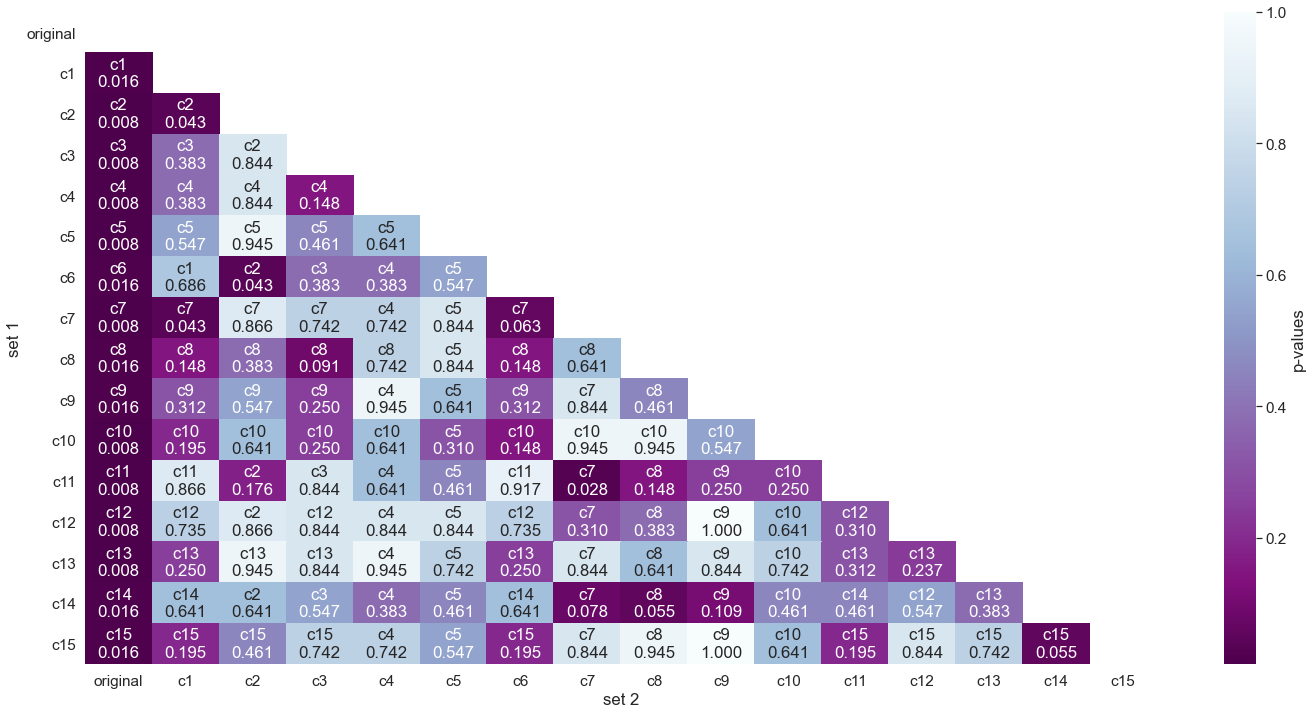

In [28]:
# Generate heatmap of p-values with winners

create_heatmap_with_winners(very_broad_wilcoxon_df, 'Heatmap of p-values | Wilcoxon test', 
                            'wilcoxon_heatmap_with_winners_very_broad')